## Pandas 與資料蒐集

In [3]:
import pandas
lvr  = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/rtibame/master/Data/lvr_with_location.xlsx')
lvr.head(1)

,index,area,trading_target,address,land_sqmeter,city_land_type,trading_ymd,trading_num,floor,total_floor,...,compartment,management,total_price,price_per_sqmeter,parking_type,parking_sqmeter,parking_price,trading_ym,lat,lng
0,0,大安區,房地(土地+建物),臺北市大安區和平東路三段1巷72弄1~30號,19.39,住,2012-06-29,土地1建物2車位0,五層,十七層,...,有,有,18680000,184999.0,NaN,0.0,0,2012-06-01,25.025,121.548


In [5]:
rent591 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv')
rent591.head(1)

,Unnamed: 0,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.25081


In [8]:
salary = pandas.read_clipboard(sep=',')
salary.head()

,Unnamed: 0,year,salary
0,1,2.4,6600
1,2,5.5,10100
2,3,3.3,7300
3,4,0.2,5000
4,5,1.5,6100


In [10]:
import pandas
data = pandas.read_json('https://raw.githubusercontent.com/ywchiu/pyfintech/master/2330.json')
data.head()

,Adj Close,Close,Date,High,Low,Open,Volume
0,172.0,172.0,2016-07-21,172.0,170.0,171.0,33130000
1,170.0,170.0,2016-07-20,170.5,169.0,170.0,38053000
2,170.5,170.5,2016-07-19,170.5,169.0,170.5,42456000
3,169.5,169.5,2016-07-18,170.0,168.0,168.0,24749000
4,169.5,169.5,2016-07-15,169.5,169.5,169.5,41000


## 使用Python Requests 存取頁面

### 使用GET

In [11]:
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/')
res

<Response [200]>

In [13]:
#res.text

### 使用POST

In [14]:
import requests
url = 'https://www.thsrc.com.tw/tw/TimeTable/SearchResult'
payload = {
'StartStation':'977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation':'fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
'SearchDate':'2017/10/29',
'SearchTime':'11:00',
'SearchWay':'DepartureInMandarin'
}
res = requests.post(url, data = payload)
res

<Response [200]>

### 台鐵簡易查詢
- http://twtraffic.tra.gov.tw/twrail/EasySearch.aspx

In [11]:
import requests
res = requests.get('http://twtraffic.tra.gov.tw/twrail/SearchResult.aspx?searchtype=0&searchdate=2017/10/29&fromstation=1810&tostation=1008&trainclass=%271100%27,%271101%27,%271102%27,%271107%27,%271110%27,%271120%27&fromtime=0600&totime=2359')
res
#res.text
type(res)

requests.models.Response

## 抓取圖片

In [20]:
import requests
res = requests.get('http://img.appledaily.com.tw/images/thumbnail/20171029/37829030_4d9274a1766895014266ebed21de057f_160x160.jpg')
with open('37829030_4d9274a1766895014266ebed21de057f_160x160.jpg', 'wb') as f:
    f.write(res.content)

## 抓取PDF

In [21]:
import requests
res = requests.get('http://www.moeasmea.gov.tw/dl.asp?filename=221414101571.pdf')
with open('221414101571.pdf', 'wb') as f:
    f.write(res.content)


In [5]:
! pip install pdfminer3k

  Running setup.py bdist_wheel for pdfminer3k: started
  Running setup.py bdist_wheel for pdfminer3k: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\cd\84\67\3eb20c984d51d38db1ca65ecba0d866407f46d8b3a9e72f7b2
Successfully built pdfminer3k


In [7]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine

s = ''
fp = open('221414101571.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        pass
        #print(lt_obj)


## 抓取591 租屋網電話圖片
- http://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-setup-4.00.00dev.exe
- 在環境變數的path 之中加入 ;C:\Program Files (x86)\Tesseract-OCR
- pip install pytesseract

In [24]:
! pip install pytesseract

  Running setup.py bdist_wheel for pytesseract: started
  Running setup.py bdist_wheel for pytesseract: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\ff\06\21\4b0d1e4d3e0e7a1c46c72a8a66a629473316f8e02614e9fdda
Successfully built pytesseract


In [22]:
import requests
res = requests.get('https://statics.591.com.tw/tools/showPhone.php?info_data=%2BLRUYe5Brb9hHOmpi2%2Fe9hxTOaI&type=rLEFMu4XrrpgEw')
with open('phone.jpg', 'wb') as f:
    f.write(res.content)

In [1]:
from PIL import Image
Image.open('phone.jpg')

In [4]:
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR'
p = pytesseract.image_to_string(Image.open('phone.jpg'))
''.join([ele.strip() for ele in p.split('-')])

'0937458235'

## 使用BeautifulSoup

In [12]:
from bs4 import BeautifulSoup

html_sample = '''
<html> 
<body> 
<h1 id="title">Hello World</h1> 
<a href="#" class="link">This is link1</a> 
<a href="# link2" class="link">This is link2</a> 
</body> 
</html>
'''

soup = BeautifulSoup(html_sample, 'html.parser')
soup.text
type(soup)

bs4.BeautifulSoup

In [13]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [14]:
soup.select_one('h1').text

'Hello World'

In [18]:
soup.select('h1')[0]

<h1 id="title">Hello World</h1>

In [19]:
soup.select('h1')[0].text

'Hello World'

In [20]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [24]:
soup.select('a')[0]
soup.select('a')[0].text

'This is link1'

In [25]:
soup.select('a')[1]
soup.select('a')[1].text

'This is link2'

In [28]:
for link in soup.select('a'):
    #print(link)
    print(link.text)

This is link1
This is link2


In [30]:
# id => #
soup.select('#title')[0].text

'Hello World'

In [31]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [32]:
from bs4 import BeautifulSoup

html_sample = '''
<html> 
<body> 
<h1 id="title">Hello World</h1> 
<a href="#" class="link link2">This is link1</a> 
<a href="# link2" class="link">This is link2</a> 
</body> 
</html>
'''

soup = BeautifulSoup(html_sample, 'html.parser')


In [33]:
soup.select('.link')

[<a class="link link2" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [34]:
soup.select('.link2')

[<a class="link link2" href="#">This is link1</a>]

In [35]:
soup.select('.link.link2')

[<a class="link link2" href="#">This is link1</a>]

In [36]:
soup.select('a.link.link2')

[<a class="link link2" href="#">This is link1</a>]

In [37]:
soup.select('#title')

[<h1 id="title">Hello World</h1>]

In [38]:
soup.select('h1#title')

[<h1 id="title">Hello World</h1>]

In [39]:
soup.select('body #title')

[<h1 id="title">Hello World</h1>]

In [42]:
for link in soup.select('.link'):
    #print(link)
    print(link['href'])

#
# link2


## 資料蒐集實務
- https://chrome.google.com/webstore/detail/infolite/ipjbadabbpedegielkhgpiekdlmfpgal

In [44]:
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/')
#res.text

In [66]:
from bs4 import BeautifulSoup
domain = 'http://www.appledaily.com.tw'
soup= BeautifulSoup(res.text, 'html.parser')
for rec in soup.select('.rtddt a'):
    #print(rec)
    title    = rec.select('h1')[0].text
    category = rec.select('h2')[0].text
    time     = rec.select('time')[0].text
    link     = domain + rec['href']
    # print(category, title , time, link)
    #print('=====================================================')

In [71]:
from bs4 import BeautifulSoup
domain = 'http://www.appledaily.com.tw'
soup= BeautifulSoup(res.text, 'html.parser')
with open('appledaily.csv', 'w', encoding='utf-8-sig') as f:
    for rec in soup.select('.rtddt a'):
        #print(rec)
        title    = rec.select('h1')[0].text
        category = rec.select('h2')[0].text
        time     = rec.select('time')[0].text
        link     = domain + rec['href']
        f.write('{}\t{}\t{}\t{}\n'.format(category, time, title, link))
    # print(category, title , time, link)
    #print('=====================================================')

### 使用Pandas 寫檔

In [74]:
news = []
for rec in soup.select('.rtddt a'):
    news_dic = {}
    news_dic['title']    = rec.select('h1')[0].text
    news_dic['category'] = rec.select('h2')[0].text
    news_dic['time']     = rec.select('time')[0].text
    news_dic['link']     = domain + rec['href']
    #print(news_dic)
    news.append(news_dic)
    

In [77]:
import pandas
df = pandas.DataFrame(news)
df.head()

,category,link,time,title
0,生活,http://www.appledaily.com.tw/realtimenews/arti...,13:34,「會賺錢vs不會賺錢」 這五大特質要看清...(0)
1,國際,http://www.appledaily.com.tw/realtimenews/arti...,13:32,蘇拉颱風風力減弱 朝東京前進 (0)
2,生活,http://www.appledaily.com.tw/realtimenews/arti...,13:31,鼻癢噴嚏打不停 台大醫給你換季5建議(4408)
3,國際,http://www.appledaily.com.tw/realtimenews/arti...,13:28,維權律師謝燕益：獄中半年沒見過陽光(0)
4,社會,http://www.appledaily.com.tw/realtimenews/arti...,13:25,【法律問蘋果】夫扣小孩健保卡不給 怎麼辦(3759)


In [78]:
df.to_excel('appledaily.xlsx')

In [79]:
df.to_csv('appledaily2.csv')

In [81]:
df[['time']].to_html('appledaily.html')

### 取得HTML 標籤內的屬性

In [61]:
a = '<a href="www.google.com" data="123" attr="qoo"> qoo </a>'
soup = BeautifulSoup(a , 'html.parser')
soup.select('a')[0]['href']

'www.google.com'

### 蘋果股價

In [82]:
! pip install pandas-datareader

  Running setup.py bdist_wheel for requests-file: started
  Running setup.py bdist_wheel for requests-file: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\3e\34\3a\c2e634ca7b545510c1b3b7d94dea084e5fdb5f33558f3c3a81
  Running setup.py bdist_wheel for requests-ftp: started
  Running setup.py bdist_wheel for requests-ftp: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\76\fb\0d\1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-file requests-ftp


In [91]:
import pandas_datareader as pdr
apple = pdr.get_data_yahoo('AAPL')

In [113]:
import pandas
iphonex = pandas.read_csv('iphonex.csv', parse_dates=['Week'])
iphonex.columns = ['Date', 'iphonex']

In [115]:
iphonex.index = iphonex.Date

In [116]:
iphonex.tail()

,Date,iphonex
Date,,
2017-09-24,2017-09-24,19
2017-10-01,2017-10-01,15
2017-10-08,2017-10-08,13
2017-10-15,2017-10-15,15
2017-10-22,2017-10-22,22


In [131]:
from datetime import datetime, timedelta
apple.index  = apple.index + timedelta(days = 1)

In [133]:
ipx = pandas.merge(apple, iphonex, left_index=True, right_index=True, how='inner')

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec', 'datetime', 'title', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


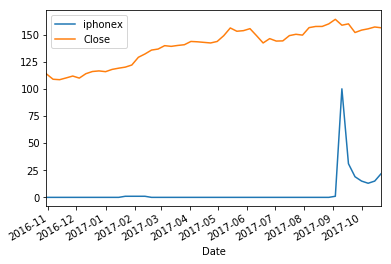

In [134]:
%pylab inline
ipx[['iphonex', 'Close']].plot(kind= 'line')

In [150]:
import pandas_datareader as pdr
#?pdr.get_data_yahoo
iphone = pdr.get_data_yahoo(['AAPL', '2317.TW', 'MSFT', 'C'],start='2014-01-01')['Close']

Populating the interactive namespace from numpy and matplotlib


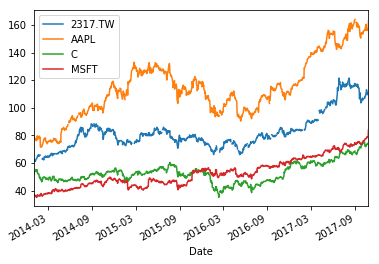

In [151]:
%pylab inline
iphone.plot(kind= 'line')

In [152]:
iphone.corr()

,2317.TW,AAPL,C,MSFT
2317.TW,1.000000,0.869762,0.823036,0.817061
AAPL,0.869762,1.000000,0.800835,0.781102
C,0.823036,0.800835,1.000000,0.660378
MSFT,0.817061,0.781102,0.660378,1.000000


In [153]:
import pandas_datareader as pdr
#?pdr.get_data_yahoo
tw = pdr.get_data_yahoo(['1101.TW', '1102.TW', '2317.TW', '2330.TW'],start='2014-01-01')['Close']

Populating the interactive namespace from numpy and matplotlib


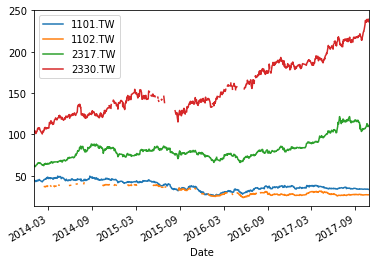

In [155]:
%pylab inline
tw.plot(kind= 'line')

In [156]:
tw.corr()

,1101.TW,1102.TW,2317.TW,2330.TW
1101.TW,1.000000,0.836477,-0.187594,-0.524893
1102.TW,0.836477,1.000000,-0.333021,-0.684081
2317.TW,-0.187594,-0.333021,1.000000,0.818523
2330.TW,-0.524893,-0.684081,0.818523,1.000000


## 抓取PTT

In [157]:
import requests
res = requests.get('https://www.ptt.cc/bbs/Tech_Job/index.html')

In [159]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [169]:
ptt_ary = []
for rec in soup.select('.r-ent'):
    #print(rec)
    ptt_dic = {}
    ptt_dic['title']  = rec.select('.title')[0].text.strip()
    ptt_dic['date']   = rec.select('.date')[0].text.strip()
    ptt_dic['author'] = rec.select('.author')[0].text.strip()
    ptt_dic['cnt']    = rec.select('.nrec')[0].text.strip()
    ptt_ary.append(ptt_dic)

In [172]:
ptt = pandas.DataFrame(ptt_ary)
ptt.to_excel('tech_job.xlsx')

## 抓取八卦板

In [176]:
import requests
cookies = {
    'over18': '1'
}
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies = cookies)
#res.text

## 抓取CK101

In [181]:
import requests
res = requests.get('https://ck101.com/')
#res.
headers = requests.utils.default_headers()
headers

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [183]:
headers = {
  'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}
res = requests.get('https://ck101.com/', headers = headers )
#res.text

## 抓取內文資訊

In [188]:
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/article/life/20171029/1230695/%E3%80%8C%E6%9C%83%E8%B3%BA%E9%8C%A2vs%E4%B8%8D%E6%9C%83%E8%B3%BA%E9%8C%A2%E3%80%8D/u3000%E9%80%99%E4%BA%94%E5%A4%A7%E7%89%B9%E8%B3%AA%E8%A6%81%E7%9C%8B%E6%B8%85%E6%A5%9A')
#res.text

In [192]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')


In [194]:
title = soup.select('#h1')[0].text
title

'「會賺錢vs不會賺錢」\u3000這五大特質要看清楚'

In [198]:
content = soup.select('#summary')[0].text
content

'日本雜誌調查「會賺錢」以及「不會賺錢」的人格特質，這5點您同意嗎？有日本網友在論壇分享某雜誌兩張報導內容，兩張圖分別畫出「年收500萬日圓(約132萬台幣)」與「年收2000萬日圓(約台幣530萬)」的特徵對比，引發其他網友熱烈討論，年收500萬的那張圖顯示的5項行為是「1.總是待在家裡，不與人交際」、「2.空閒的時間總是不知道要幹嘛」、「3.公司離家裡很遠」、「4.完全不看報章雜誌」、「5.總是不出門、完全不旅遊」。相較之下，年收2000萬的特質則是「1.善於社交、獲得情報」、「2.總是掌握政治、經濟等議題」、「3.沒有什麼空閒時間」、「4.充滿能量、行動力十足」、「5.讀書量多、定期購買雜誌」，當然一個人有錢與否，因素還很多，雜誌的調查結果當參考用比較好！（即時新聞中心／綜合報導）'

In [201]:
dt = soup.select('.gggs time')[0].text
dt

'2017年10月29日13:34'

In [202]:
clicked = soup.select('.clicked')[0].text
clicked

'人氣(8646)'

## 完成爬蟲流程

In [203]:
import requests
from bs4 import BeautifulSoup

In [210]:
def pageDetail(url):
    res     = requests.get(url)
    soup    = BeautifulSoup(res.text, 'html.parser')
    title   = soup.select('#h1')[0].text
    summary = soup.select('#summary')[0].text
    dt      = soup.select('.gggs time')[0].text
    clicked = None
    try:
        clicked = soup.select('.clicked')[0].text
    except:
        pass
    return {'title':title, 'summary':summary, 'dt':dt, 'clicked':clicked}


In [211]:
pageDetail('http://www.appledaily.com.tw/realtimenews/article/life/20171029/1230695/%E3%80%8C%E6%9C%83%E8%B3%BA%E9%8C%A2vs%E4%B8%8D%E6%9C%83%E8%B3%BA%E9%8C%A2%E3%80%8D/u3000%E9%80%99%E4%BA%94%E5%A4%A7%E7%89%B9%E8%B3%AA%E8%A6%81%E7%9C%8B%E6%B8%85%E6%A5%9A')

{'clicked': '人氣(9291)',
 'dt': '2017年10月29日13:34',
 'summary': '日本雜誌調查「會賺錢」以及「不會賺錢」的人格特質，這5點您同意嗎？有日本網友在論壇分享某雜誌兩張報導內容，兩張圖分別畫出「年收500萬日圓(約132萬台幣)」與「年收2000萬日圓(約台幣530萬)」的特徵對比，引發其他網友熱烈討論，年收500萬的那張圖顯示的5項行為是「1.總是待在家裡，不與人交際」、「2.空閒的時間總是不知道要幹嘛」、「3.公司離家裡很遠」、「4.完全不看報章雜誌」、「5.總是不出門、完全不旅遊」。相較之下，年收2000萬的特質則是「1.善於社交、獲得情報」、「2.總是掌握政治、經濟等議題」、「3.沒有什麼空閒時間」、「4.充滿能量、行動力十足」、「5.讀書量多、定期購買雜誌」，當然一個人有錢與否，因素還很多，雜誌的調查結果當參考用比較好！（即時新聞中心／綜合報導）',
 'title': '「會賺錢vs不會賺錢」\u3000這五大特質要看清楚'}

In [212]:
pageDetail('http://www.appledaily.com.tw/realtimenews/article/life/20171029/1231158/%E5%BD%B0%E5%8C%96%E9%A6%AC%E6%8B%89%E6%9D%BE%E6%9C%88%E9%96%8B%E8%B7%91%E3%80%804%E5%91%A8%E9%80%A34%E5%A0%B4%E8%B3%BD%E4%BA%8B')

{'clicked': None,
 'dt': '2017年10月29日15:44',
 'summary': '2017彰化縣馬拉松月今天開跑！首先登場的是「嬉遊百果山－員林獅子盃半程馬拉松暨第9屆路跑」，今天在員林市員林國民小學操場開跑，彰化縣長魏明谷、員林市長張錦昆等，一起為鳴槍起跑。接著還有二水、田中、鹿港等路跑活動，將在接下來的3個周日陸續舉行。員林獅子盃路跑活動從一開始只有幾千人參與，到現在每年都有上萬人到彰化員林參加，也有許多陪同的親友一起來加油，也成為全國指標性的路跑活動之一，主辦單位也為每一位選手，捐出10元給弱勢社團，槍聲響起，穿著紫色上衣的選手往終點奔去，員林市街道一片紫，相當鮮豔、有活力，路跑完賽後，還有不少人騎著YouBike在員林趴趴走，暢遊員林文化觀光及品嘗小吃美食。魏明谷說，員林獅子盃馬拉松邁入第9年，今年新增半程馬拉松（21公里），接著將在二水（11月5日）、田中（11月12日）、鹿港（11月19日）各舉辦路跑活動，堪稱馬拉松界的優質賽事大集合，希望用運動行銷彰化、帶動地方產業，更能強身。員林獅子會會長陳志弘表示，全國各地跑者踴躍報名參加今天的盛會，期望選手在路跑過程中能欣賞彰化的沿途風景，並以安全為最大考量，讓大家都跑得愉快。（鄧惠珍／彰化報導）',
 'title': '彰化馬拉松月開跑\u30004周連4場賽事'}

In [222]:
url = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'
for i in range(1,3):
    print(url.format(i))

http://www.appledaily.com.tw/realtimenews/section/new/1
http://www.appledaily.com.tw/realtimenews/section/new/2


In [223]:
domain = 'http://www.appledaily.com.tw'
url = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'

news_ary = []
for i in range(1,11):
    res  = requests.get(url.format(i))
    soup = BeautifulSoup(res.text, 'html.parser')

    for rec in soup.select('.rtddt a'):
        #print(rec)
        news_dic = {}
        news_dic['link']     = domain + rec['href']
        news_dic['category'] = rec.select('h2')[0].text
        content_dic          = pageDetail(news_dic['link'])
        news_dic.update(content_dic)
        news_ary.append(news_dic)
    print(i)
    #print('=================================')

1
2
3
4
5
6
7
8
9
10


In [224]:
import pandas
newspd = pandas.DataFrame(news_ary)
newspd.head()

,category,clicked,dt,link,summary,title
0,時尚,None,2017年10月29日16:12,http://www.appledaily.com.tw/realtimenews/arti...,英國人權律師艾默克魯尼（Amal Clooney）產後4個多月不僅迅速恢復身形，除了重返工作...,克魯尼嬌妻華麗迪斯可Look 頂爆炸頭比美超模
1,生活,None,2017年10月29日16:11,http://www.appledaily.com.tw/realtimenews/arti...,台中市政府舉辦的「搖滾台中」將於下月4日、5日在台中公園登場，超過50組藝人輪番嗨唱搖滾之夜...,搖滾台中下周六登場 50樂團不斷電演出
2,體育,None,2017年10月29日16:10,http://www.appledaily.com.tw/realtimenews/arti...,Lamigo桃猿今天先發名單做出調整，由於先發投手是左投道恩斯，因此安排「御用」捕手嚴宏鈞。...,道恩斯御用捕手 嚴宏鈞：我阻殺好
3,社會,None,2017年10月29日16:08,http://www.appledaily.com.tw/realtimenews/arti...,台中梨山一名賣茶葉的汪姓男子，3年前和經營飯店的7旬羅姓鄰居因停車問題爭吵，汪朝羅的臉部揍3...,揮3拳就讓老鄰居慘死 法官認：「沒殺機」
4,社會,None,2017年10月29日16:05,http://www.appledaily.com.tw/realtimenews/arti...,新北市三峽區大埔路一處空地，昨天28日清晨4時許，發生一名19歲男子與人談判不成，竟遭兩名兇...,供稱借不到機車 雙方糾眾談判砍成重傷


In [226]:
newspd.to_excel('appledaily2.xlsx')

## 抓取591 資訊

In [230]:
import requests
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}
res = requests.get('https://rent.591.com.tw/?kind=1&region=1&section=5', headers = headers)
#res.text

In [234]:
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=180&totalRows=749'
res = requests.get(url, headers = headers)
jd = res.json()

In [243]:
import pandas
df = pandas.DataFrame(jd['data']['data'])
df.head(1)

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,0,,新生南路二段正面大安森林公園..,正面大安森林公園~SRC崗石豪邸3房含車,正面大安森林公園~SRC崗石豪邸3房含車,,15,...,0,新生南路二段,25668,1,元/月,1507034359,1011506,,,


In [241]:
df=df[['address','floor','allfloor','layout','area','price','browsenum_all']]

In [242]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,新生南路二段正面大安森林公園..,4,15,3房2廳3衛,157.7,"210,000",222
1,信義路二段東門站旁★超值挑高..,2,11,2房1廳1衛,11.6,"30,000",472
2,金山南路二段31巷【東門站精選..,3,6,4房2廳2衛,35.1,"38,000",373
3,信義路二段【東門站精選】優質..,11,14,3房2廳2衛,53.2,"90,000",139
4,信義路四段信義安和電梯4房09..,2,7,4房2廳2衛,46.4,"52,000",135


## 完成591爬蟲

In [244]:
import requests
import pandas
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=749'
rent_591 = []
for i in range(0,25):
    res = requests.get(url.format(i * 30), headers = headers)
    jd = res.json()
    df = pandas.DataFrame(jd['data']['data'])
    rent_591.append(df)

In [249]:
housedf = pandas.concat(rent_591)

In [250]:
housedf = housedf[['id','address','floor','allfloor','layout','area','price','browsenum_all']]

In [251]:
housedf['price'] = housedf['price'].map(lambda e: int(e.replace(',','')) )

In [257]:
housedf.sort_values('price',ascending=False).head(3)

,id,address,floor,allfloor,layout,area,price,browsenum_all
13,5697458,仁愛路三段帝寶我成交多戶此為..,8,18,開放式格局,210.7,350000,298
28,5660318,敦化南路236巷精緻裝潢，..,8,12,3房2廳2衛,94.0,330000,683
29,5724136,復興南路二段★近大安站★獨家..,6,8,3房2廳4衛,103.6,250000,56


In [256]:
housedf.to_excel('rent591_2.xlsx')

## Crawl website through proxy

In [ ]:
import requests
proxies = {
   'http': 'http://45.76.77.147:3128',
   'https': 'http://45.76.77.147:3128'
}

res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/', proxies = proxies)
res.text
